## Load dependencies and object

In [1]:
# The perpuse of this notebook is to visually show that the new features added to athena, 
# namely the sub set graph building fucntionality, works appropriately. 

# Note: this notebook should be run in an environment where the pubilicly available athena version of the package is not installed. 
# Needles to say all of the other dependencies described in the requirements.txt and dev_requirements.txt should be avilable.

import os
import sys
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
import seaborn as sns
from skimage.measure import regionprops_table

# Add path to the ATHENA beta repository
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import Local package
import athena as ath

# Loead data
so = ath.dataset.imc()

# Define sample
spl = 'slide_49_By2x5'

# Extrac centroids
ath.pp.extract_centroids(so, spl, mask_key='cellmasks')

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


## Construct full graphs

In [2]:
# import default graph builder parameters and build grahs using ALL NODES
from athena.utils.default_configs import GRAPH_BUILDER_DEFAULT_PARAMS
import copy as cp

# kNN graph
config = cp.deepcopy(GRAPH_BUILDER_DEFAULT_PARAMS['knn'])
config['builder_params']['n_neighbors'] = 6 # set parameter k
ath.graph.build_graph(so, spl, builder_type='knn', config=config)

# radius graph
config = cp.deepcopy(GRAPH_BUILDER_DEFAULT_PARAMS['radius'])
config['builder_params']['radius'] = 20 # set radius
ath.graph.build_graph(so, spl, builder_type='radius', config=config)

# contact graph - this takes some time
config = cp.deepcopy(GRAPH_BUILDER_DEFAULT_PARAMS['contact'])
ath.graph.build_graph(so, spl, builder_type='contact', config=config)

# the results are saved back into `.G`:
so.G[spl]

100%|███████████████████████████████████████| 1541/1541 [00:24<00:00, 63.39it/s]


{'contact': <networkx.classes.graph.Graph at 0x7f7d5e667a30>,
 'knn': <networkx.classes.graph.Graph at 0x7f7d3ea9a8e0>,
 'radius': <networkx.classes.graph.Graph at 0x7f7aadc999a0>}

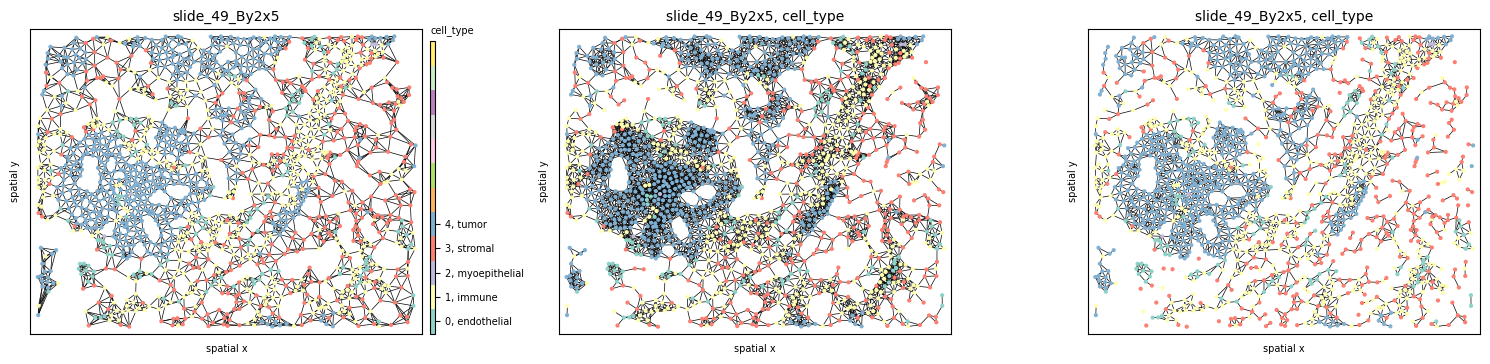

In [3]:
# Viuslaize full-graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 6), dpi=100)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='knn', ax=axs.flat[0], cbar=True)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='radius', ax=axs.flat[1], cbar=False)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='contact', ax=axs.flat[2], cbar=False)

## Construct subset (concept) graphs

In [4]:
# Decide on subset
labels = ['endothelial', 'tumor']
filter_col = 'cell_type'

# Build subset graphs
# kNN graph
config = cp.deepcopy(GRAPH_BUILDER_DEFAULT_PARAMS['knn'])
config['builder_params']['n_neighbors'] = 6 # set parameter k
config['concept_params']['filter_col'] = filter_col
config['concept_params']['labels'] = labels
ath.graph.build_graph(so, spl, builder_type='knn', config=config)

# radius graph
config = cp.deepcopy(GRAPH_BUILDER_DEFAULT_PARAMS['radius'])
config['builder_params']['radius'] = 20 # set radius
config['concept_params']['filter_col'] = filter_col
config['concept_params']['labels'] = labels
ath.graph.build_graph(so, spl, builder_type='radius',config=config)

# contact graph - this takes some time
config = cp.deepcopy(GRAPH_BUILDER_DEFAULT_PARAMS['contact'])
config['concept_params']['filter_col'] = filter_col
config['concept_params']['labels'] = labels
ath.graph.build_graph(so, spl, builder_type='contact', config=config)

# the results are saved back into `.G`:
so.G[spl]

100%|█████████████████████████████████████████| 714/714 [00:11<00:00, 62.41it/s]


{'contact': <networkx.classes.graph.Graph at 0x7f7d5e667a30>,
 'knn': <networkx.classes.graph.Graph at 0x7f7d3ea9a8e0>,
 'radius': <networkx.classes.graph.Graph at 0x7f7aadc999a0>,
 "knn > cell_type > ['endothelial', 'tumor']": <networkx.classes.graph.Graph at 0x7f7bfd61ee80>,
 "radius > cell_type > ['endothelial', 'tumor']": <networkx.classes.graph.Graph at 0x7f7bee638d60>,
 "contact > cell_type > ['endothelial', 'tumor']": <networkx.classes.graph.Graph at 0x7f7bfd617f40>}

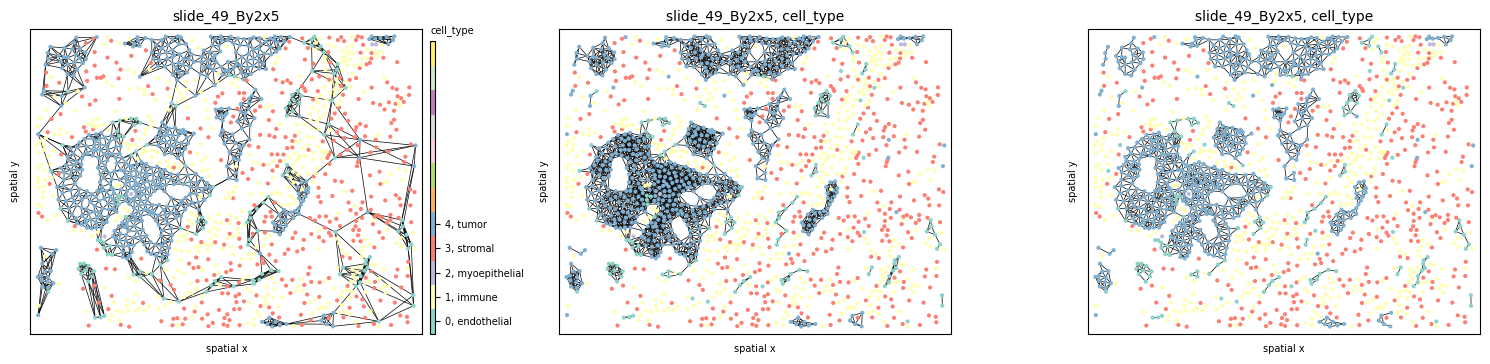

In [5]:
# Viuslaize full-graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 6), dpi=100)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='knn', ax=axs.flat[0], cbar=True)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='radius', ax=axs.flat[1], cbar=False)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='contact', ax=axs.flat[2], cbar=False)